In [ ]:
##### My name is Deepak Gupta and I am work as a Data Scientist Intern at Unified Mentor Pvt. Ltd. #####

<h2>Data Visualization of Bird Strikes between 2000 – 2011</h2>
<br>
<p>Transport and communication are in the crucial domain in the field of analytics. Environmental impacts and safety are, nowadays, two major concerns of the scientific community with respect to transport scenarios and to the ever-growing urban areas. These issues gain more importance due to the increasing amount of vehicles and people. Seeking new solutions is reaching a point where available technologies and artificial intelligence, especially MAS, are being recognized as ways to cope with and
tackle these kinds of problems in a distributed and more appropriate way.
    
A bird strike is strictly defined as a collision between a bird and an aircraft which is in flight or on a take-off or landing roll. The term is often expanded to cover other wildlife strikes - with bats or ground animals. Bird Strike is common and can be a significant threat to aircraft safety. For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in several fatal accidents.
    
Bird strikes may occur during any phase of flight, but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels. To have a closer look the following document visually depicts the data collected on Bird Strikes by FAA between 2000-2011.</p>

<h4>Simple Code Fashion</h4>
(Modular code will be available below.)

<h4>Importing Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Reading Data</h4>

In [2]:
x = pd.read_csv("Bird Strikes data.xlsx - Bird Strikes.csv")
df = pd.DataFrame(x)
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


<h4>Visualize Number of Bird Strikes over the years</h4>

C:\Users\mnaku\AppData\Local\Temp\ipykernel_14220\2794514800.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


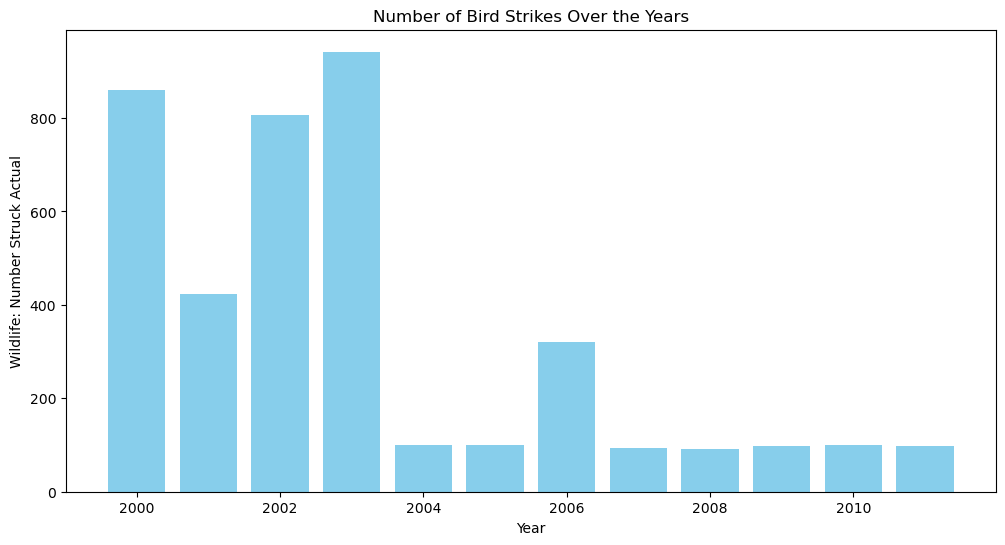

In [3]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Wildlife: Number Struck Actual')
plt.title('Number of Bird Strikes Over the Years')
plt.show()


<h4>Yearly Analysis & Bird Strikes in the US</h4>

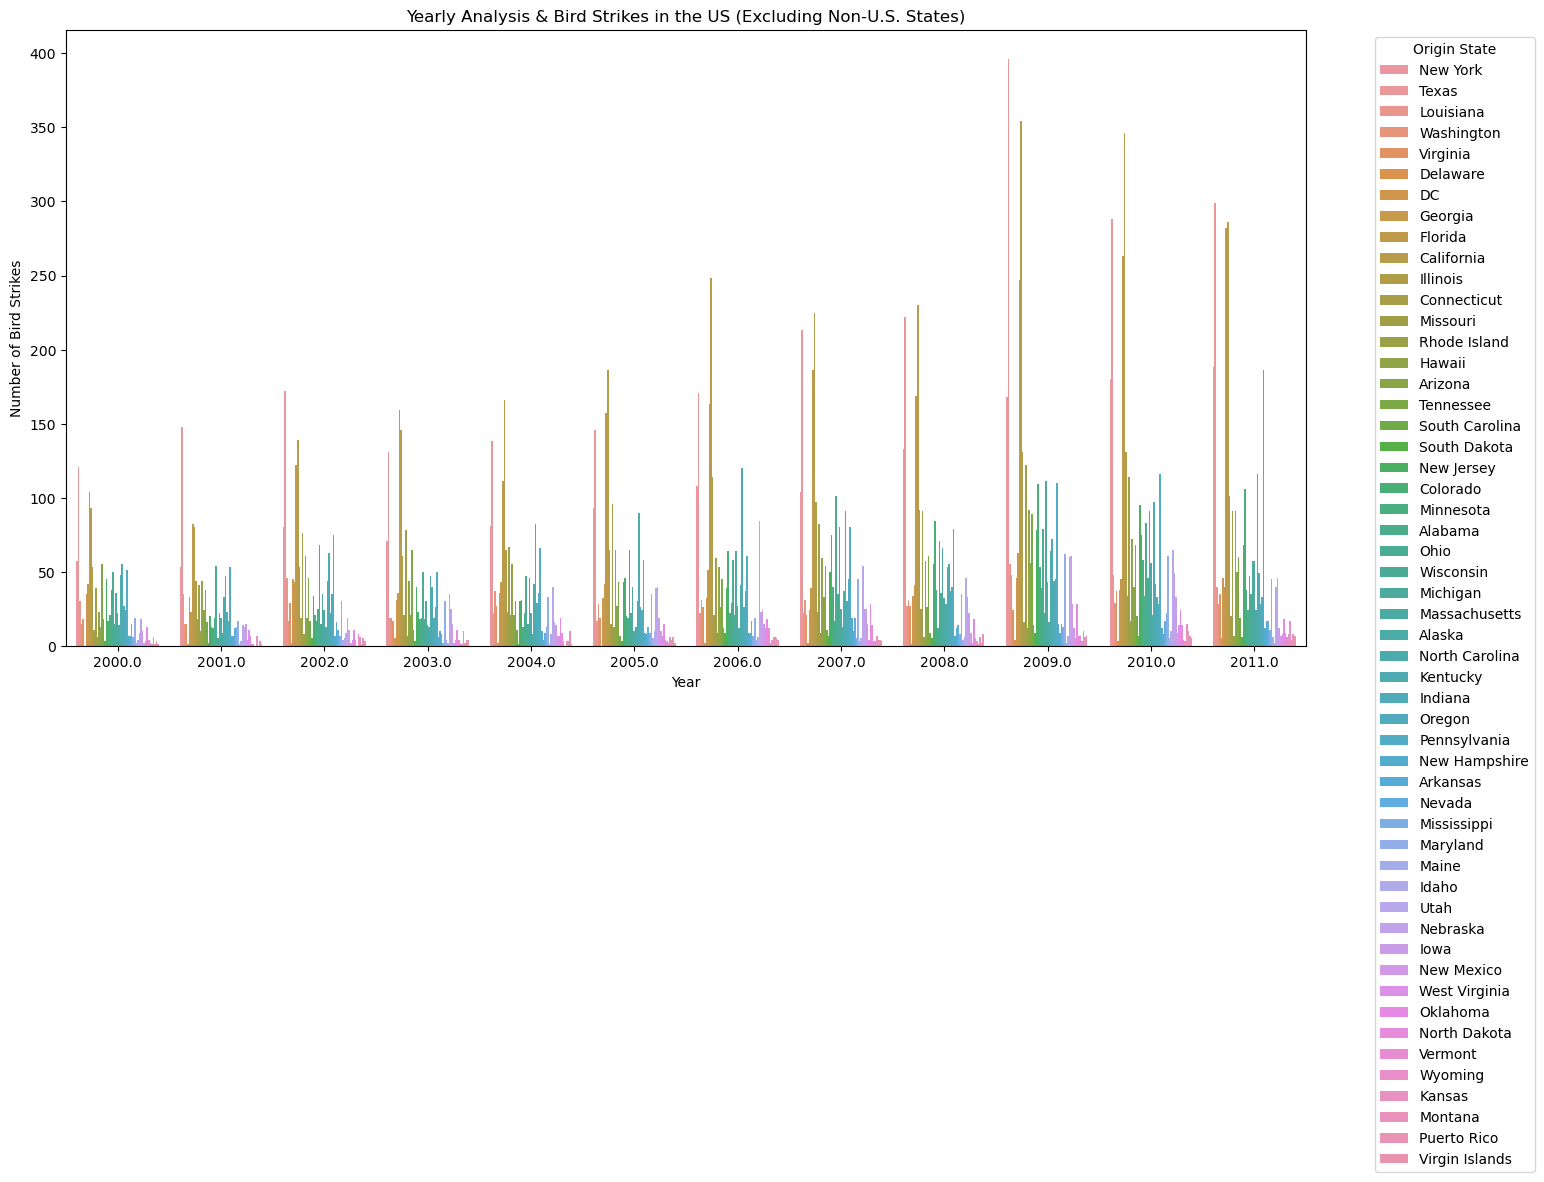

In [5]:

df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract year from 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

# List of non-U.S. states and territories to exclude
non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario', 
                  'Newfoundland and Labrador', 'Alberta', 'Saskatchewan']

df_us = df[~df['Origin State'].isin(non_us_states)]   # Filter rows where 'Origin State' is not in the non-U.S. states list


plt.figure(figsize=(16, 8))
sns.countplot(x='Year', hue='Origin State', data=df_us)
plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h4>Top 10 US Airlines in terms of having encountered bird strikes</h4>

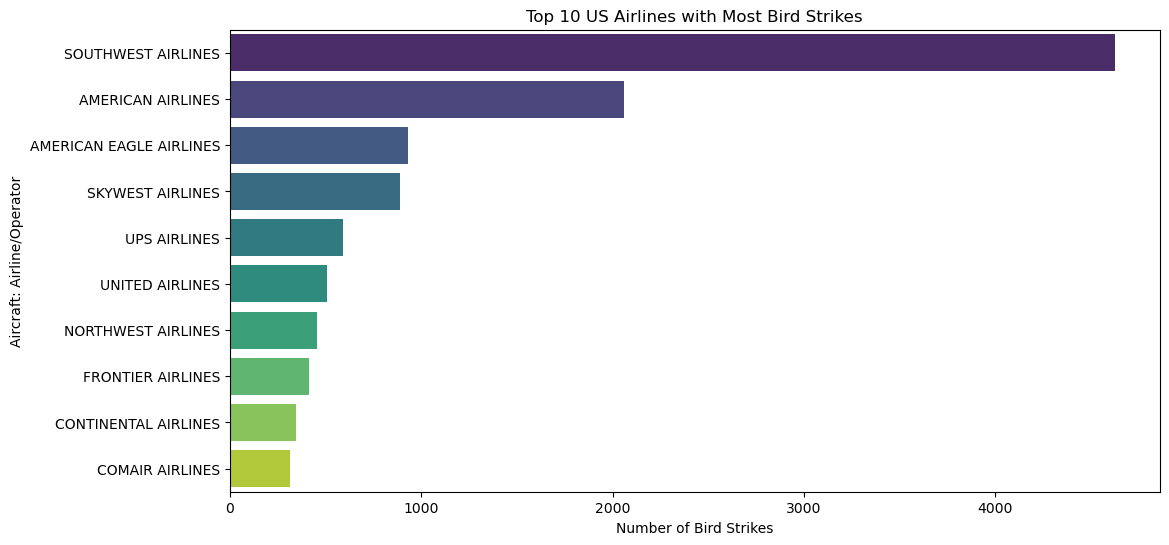

In [7]:
df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]

# Plot the top 10 U.S. airlines with the most bird strikes
plt.figure(figsize=(12, 6))
top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft: Airline/Operator')
plt.show()

<h4>Airports with most incidents of bird strikes – Top 50</h4>

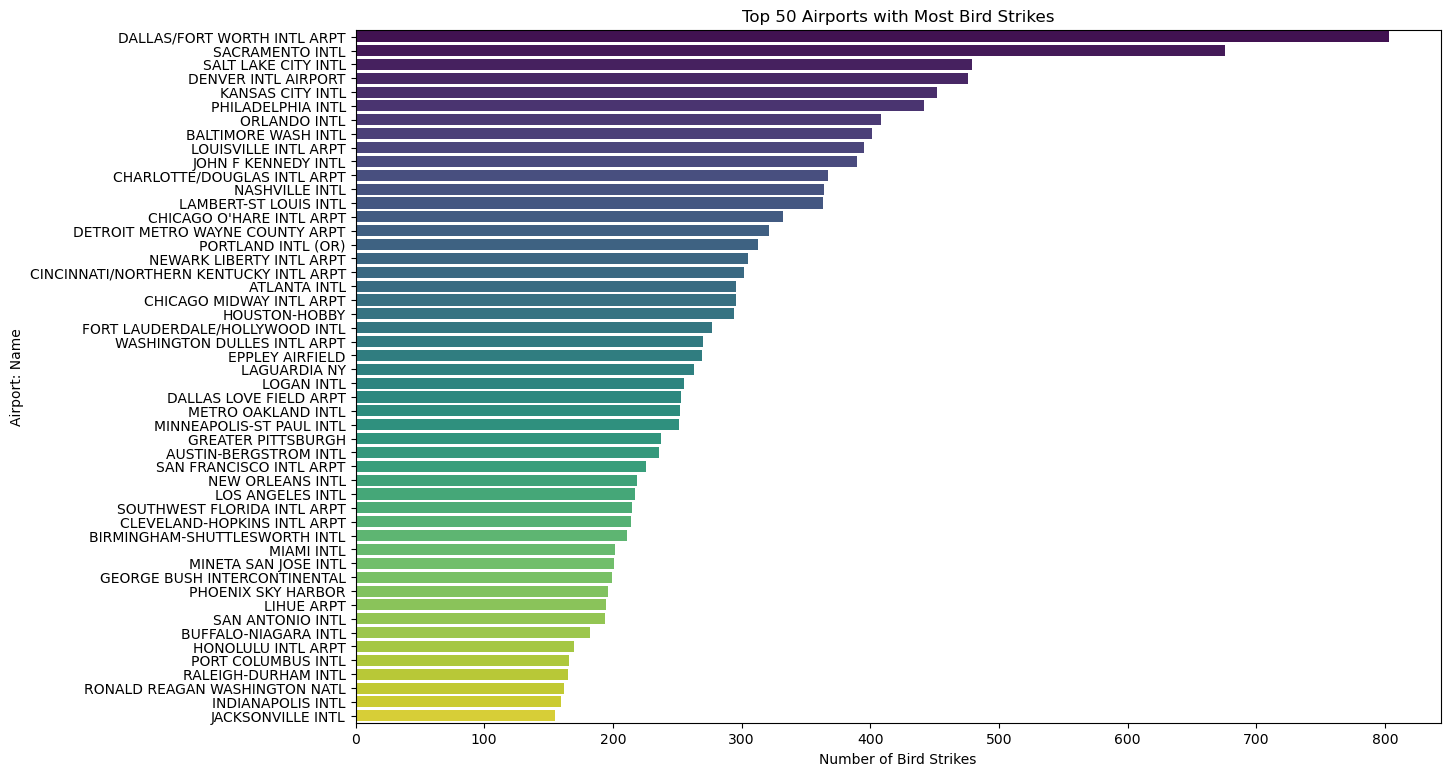

In [9]:
plt.figure(figsize=(14, 9))
top_airports = df['Airport: Name'].value_counts().nlargest(50)
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport: Name')
plt.show()

<h4>Yearly Cost Incurred due to Bird Strikes:</h4>

C:\Users\mnaku\AppData\Local\Temp\ipykernel_14220\842897069.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')


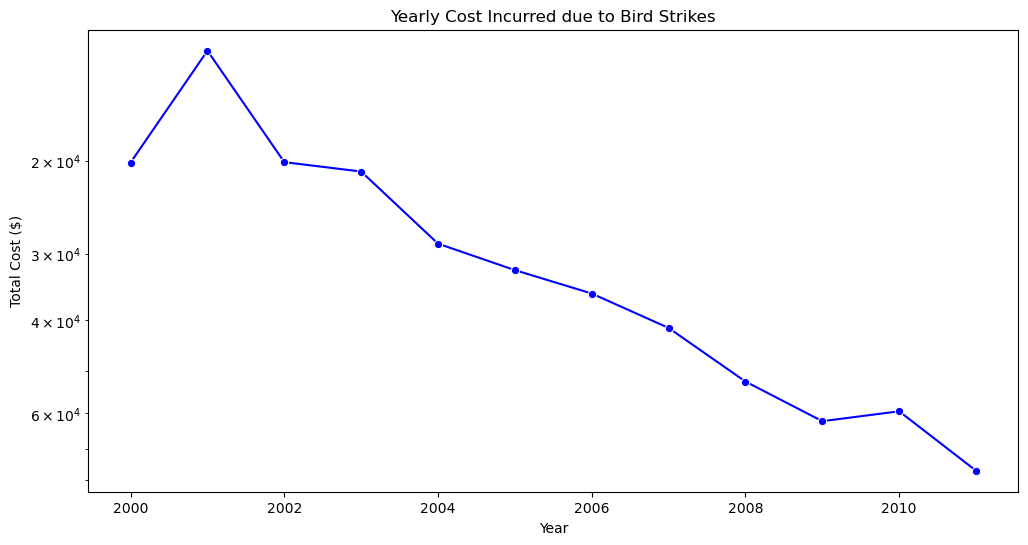

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')
plt.yscale('log')  # Using a logarithmic scale
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

<h4> When do most bird strikes occur?</h4>

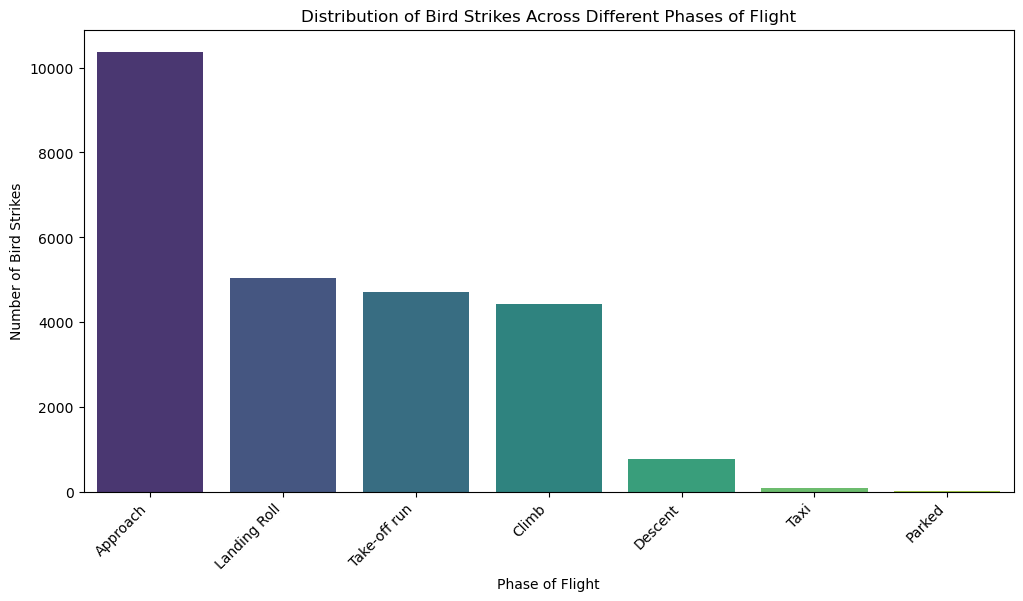

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

<h4>Altitude of aeroplanes at the time of strike</h4>

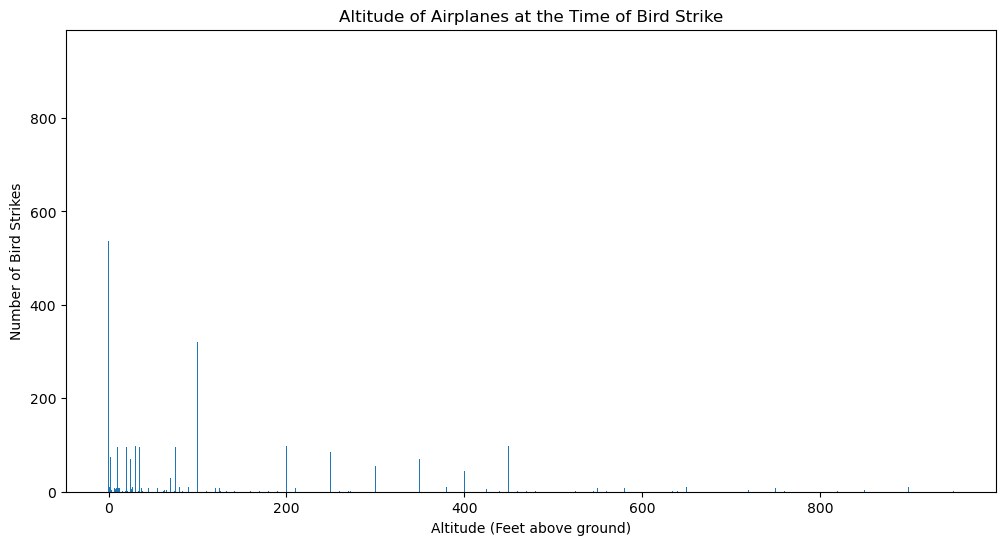

In [29]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Altitude (Feet above ground)')
plt.ylabel('Number of Bird Strikes')
plt.show()

<h4>Phase of flight at the time of the strike.</h4>

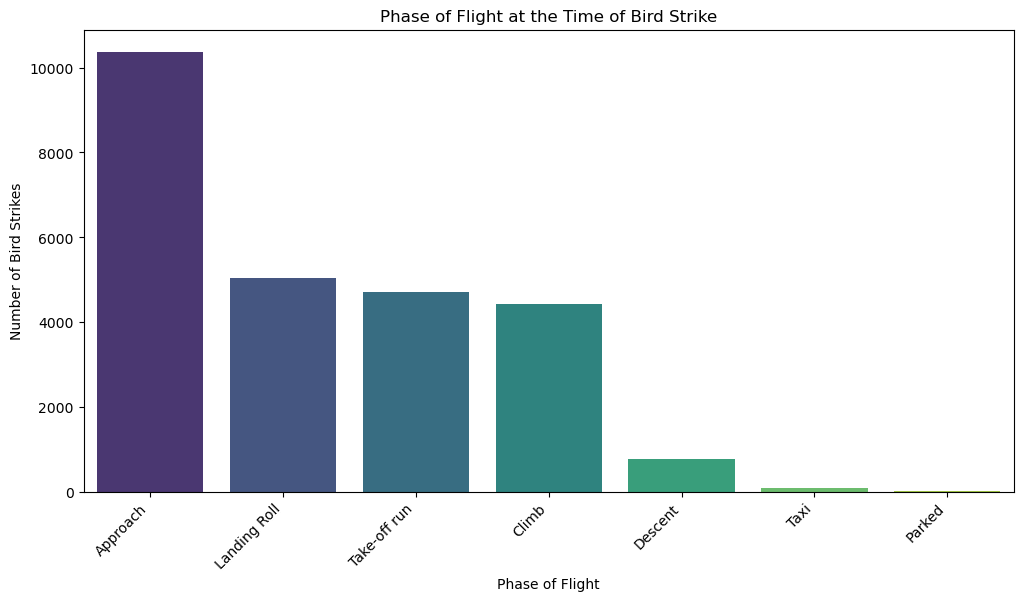

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Phase of Flight at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

<h4>Average Altitude of the aeroplanes in different phases at the time of strike</h4>

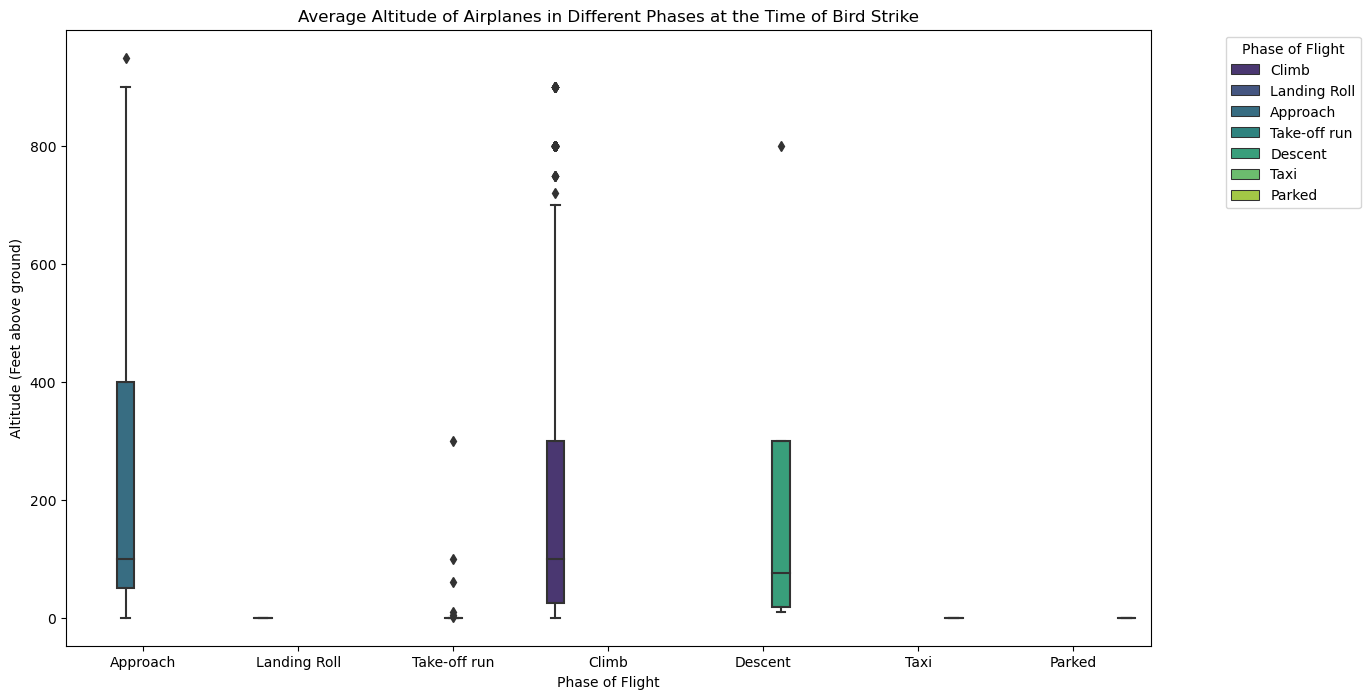

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df, 
            order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude (Feet above ground)')
plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

<h4>Effect of Bird Strikes & Impact on Flight</h4>

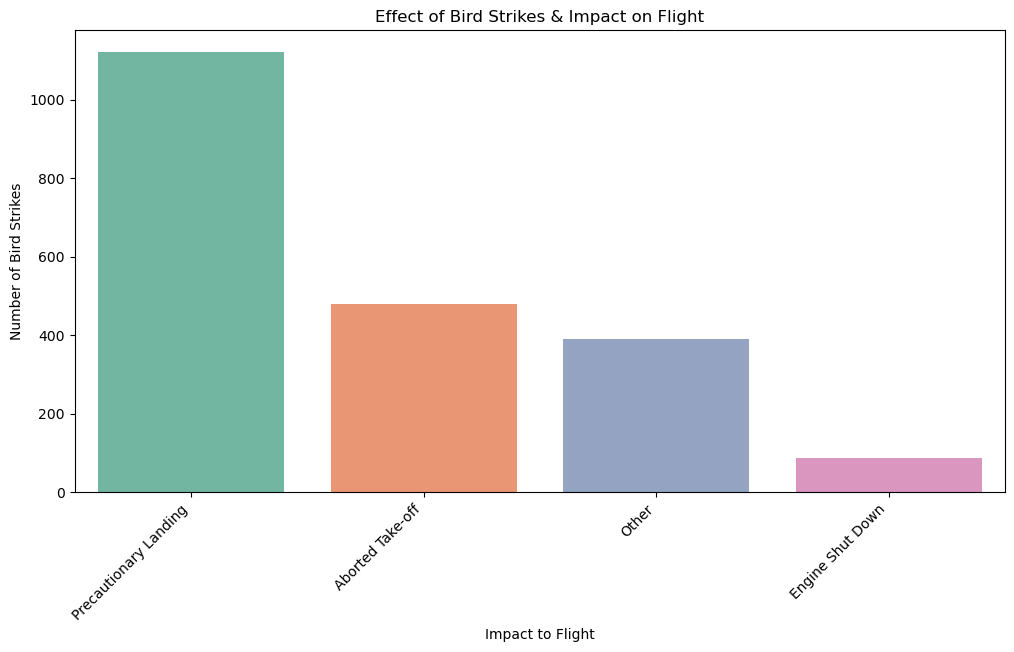

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<h4> Effect of Strike at Different Altitude </h4>

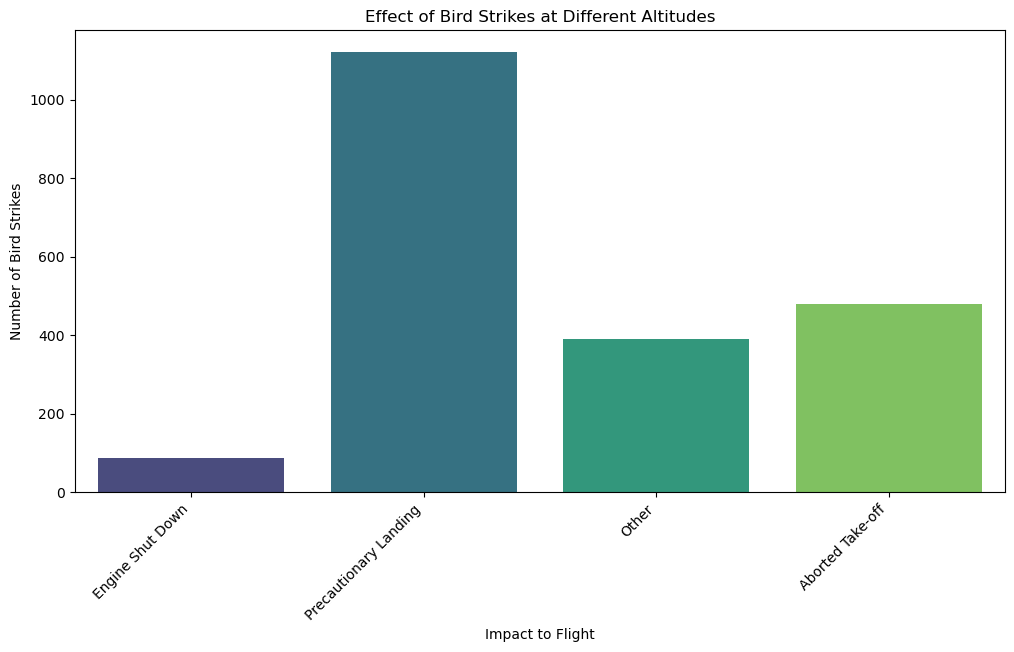

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

<h4>Were Pilots Informed? & Prior Warning and Effect of Strike Relation</h4>

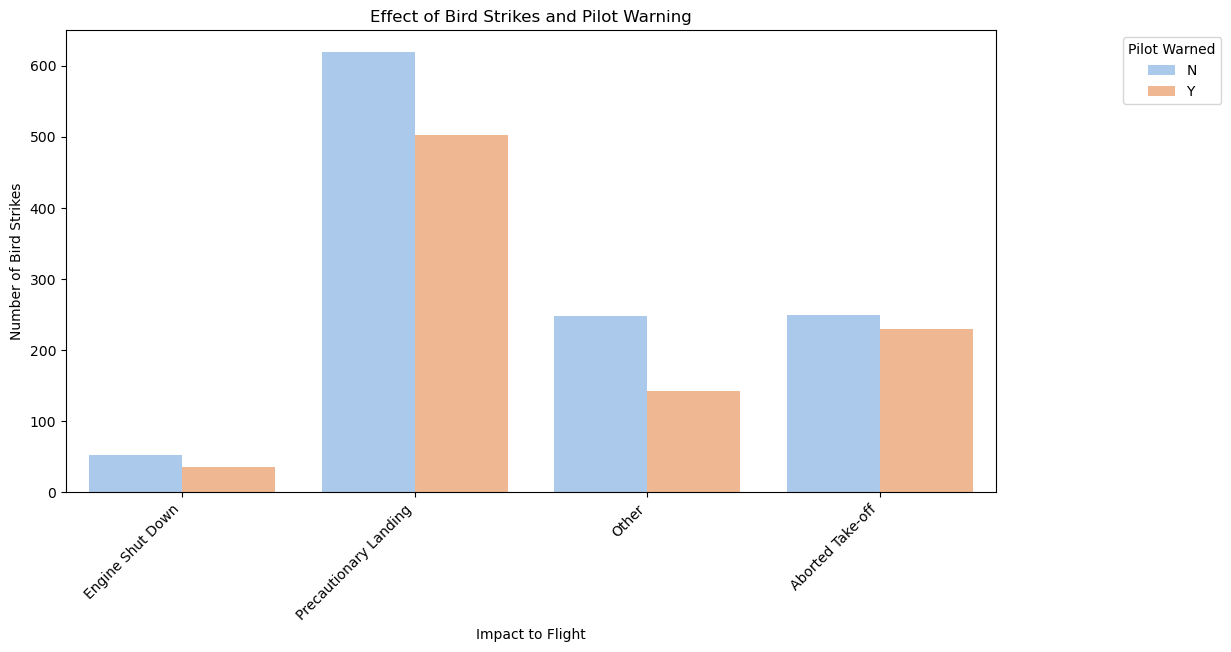

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
plt.title('Effect of Bird Strikes and Pilot Warning')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

<h3>Modular Format</h3>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [54]:
def visualize_number_of_strikes_over_years(df):
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    df['Year'] = df['FlightDate'].dt.year
    plt.figure(figsize=(12, 6))
    plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Wildlife: Number Struck Actual')
    plt.title('Number of Bird Strikes Over the Years')
    plt.show()

In [55]:
def yearly_analysis_and_strikes_in_us(df):
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    df['Year'] = df['FlightDate'].dt.year

    non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario',
                      'Newfoundland and Labrador', 'Alberta', 'Saskatchewan']

    df_us = df[~df['Origin State'].isin(non_us_states)]

    plt.figure(figsize=(16, 8))
    sns.countplot(x='Year', hue='Origin State', data=df_us)
    plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
    plt.xlabel('Year')
    plt.ylabel('Number of Bird Strikes')
    plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [56]:
def top_us_airlines_with_most_strikes(df):
    df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]

    plt.figure(figsize=(12, 6))
    top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
    sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
    plt.title('Top 10 US Airlines with Most Bird Strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Aircraft: Airline/Operator')
    plt.show()

In [57]:
def top_airports_with_most_incidents(df):
    plt.figure(figsize=(14, 9))
    top_airports = df['Airport: Name'].value_counts().nlargest(50)
    sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
    plt.title('Top 50 Airports with Most Bird Strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Airport: Name')
    plt.show()

In [58]:
def yearly_cost_incurred_due_to_strikes(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')
    plt.yscale('log')
    plt.title('Yearly Cost Incurred due to Bird Strikes')
    plt.xlabel('Year')
    plt.ylabel('Total Cost ($)')
    plt.show()

In [59]:
def bird_strikes_distribution_across_phases(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [60]:
def altitude_of_airplanes_at_time_of_strike(df):
    df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

    plt.figure(figsize=(12, 6))
    plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
    plt.title('Altitude of Airplanes at the Time of Bird Strike')
    plt.xlabel('Altitude (Feet above ground)')
    plt.ylabel('Number of Bird Strikes')
    plt.show()

In [61]:
def phase_of_flight_at_time_of_strike(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Phase of Flight at the Time of Bird Strike')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [62]:
def average_altitude_of_airplanes_in_different_phases(df):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df,
                order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Altitude (Feet above ground)')
    plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

In [63]:
def effect_of_bird_strikes_and_impact_on_flight(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')
    plt.title('Effect of Bird Strikes & Impact on Flight')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [64]:
def effect_of_strike_at_different_altitude(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')
    plt.title('Effect of Bird Strikes at Different Altitudes')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [65]:
def pilot_warning_and_effect_of_strike_relation(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
    plt.title('Effect of Bird Strikes and Pilot Warning')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

In [66]:
file_path = "Bird Strikes data.xlsx - Bird Strikes.csv"
bird_strikes_df = load_data(file_path)

C:\Users\mnaku\AppData\Local\Temp\ipykernel_14220\292034850.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


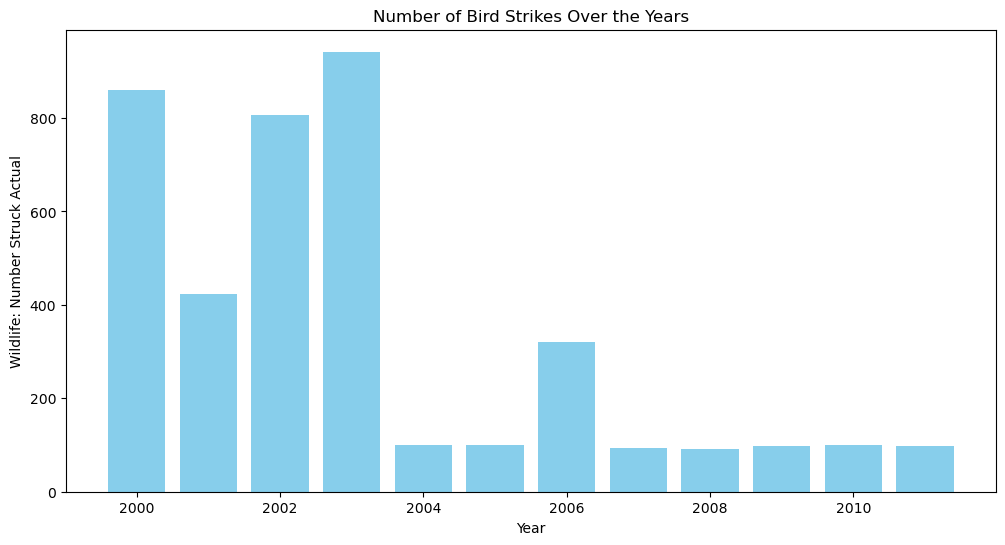

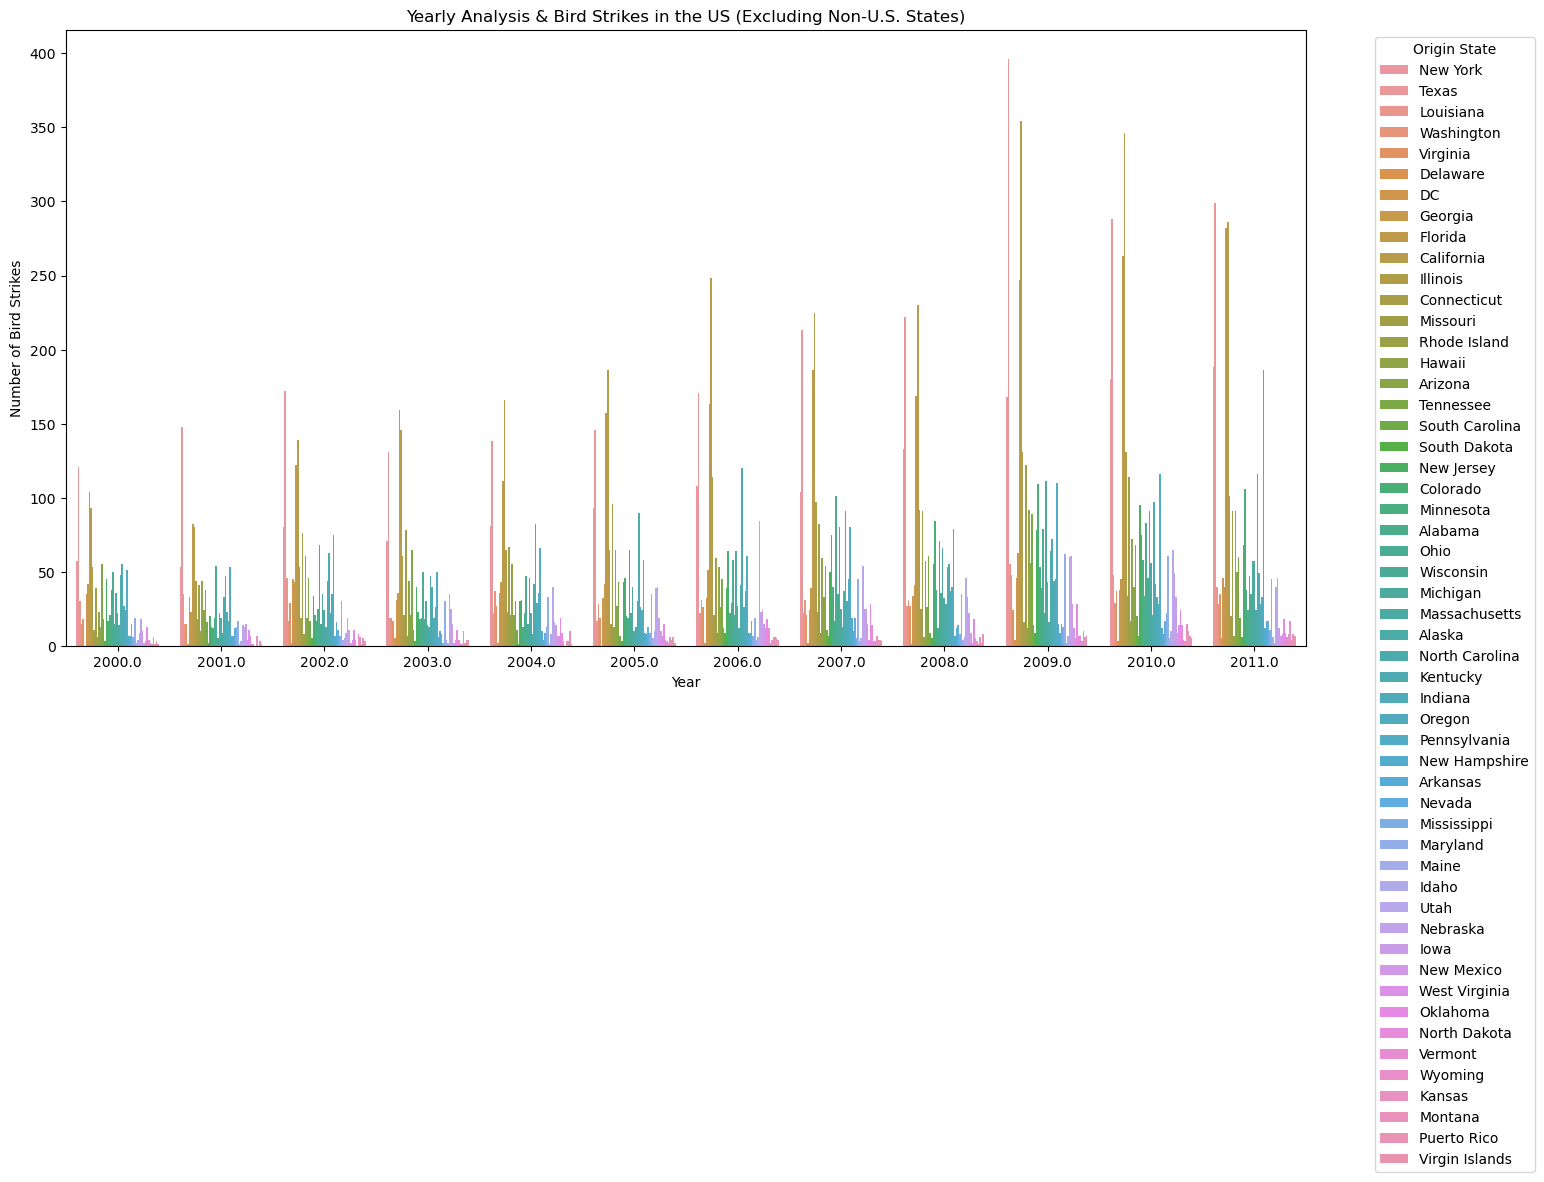

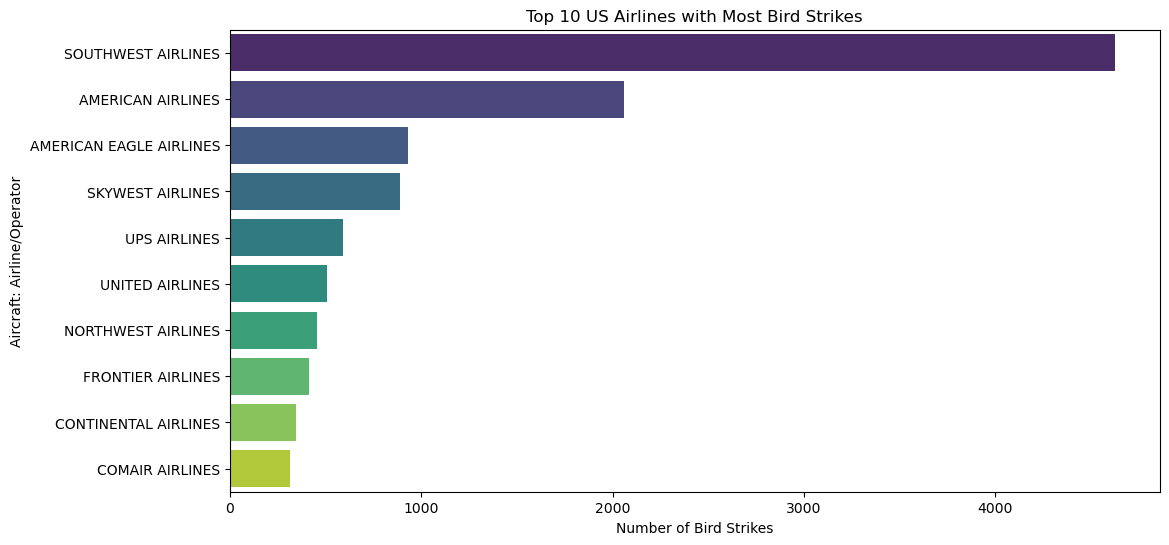

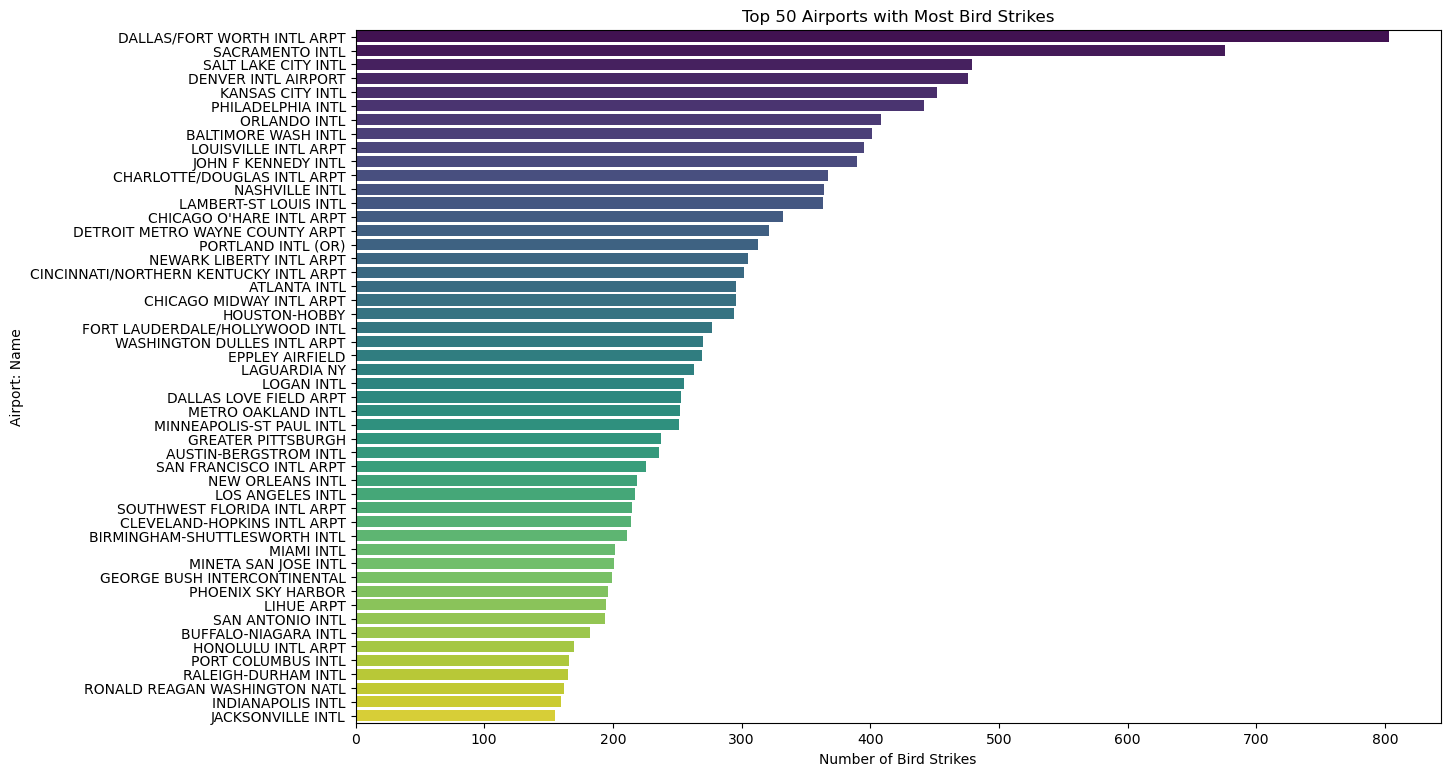

C:\Users\mnaku\AppData\Local\Temp\ipykernel_14220\3628955046.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')


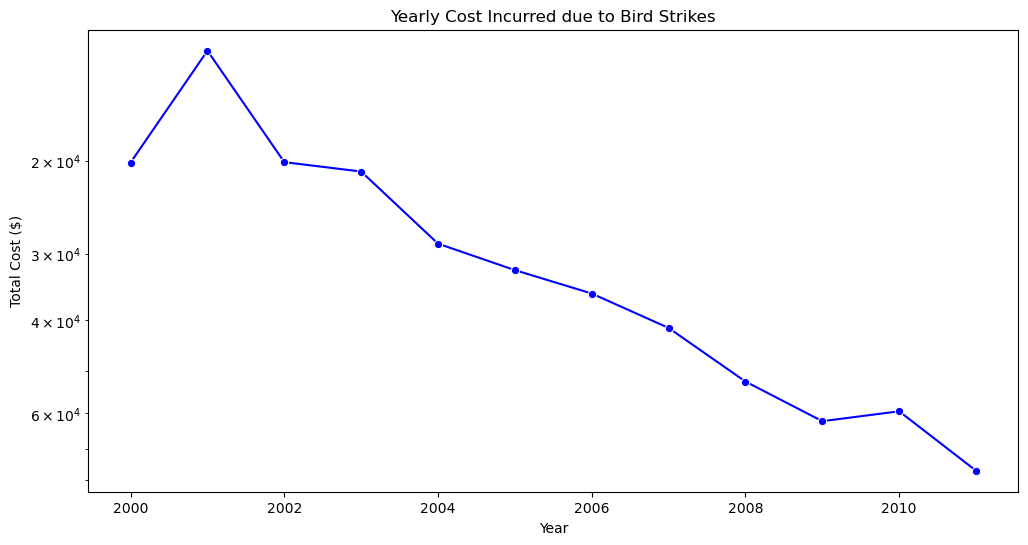

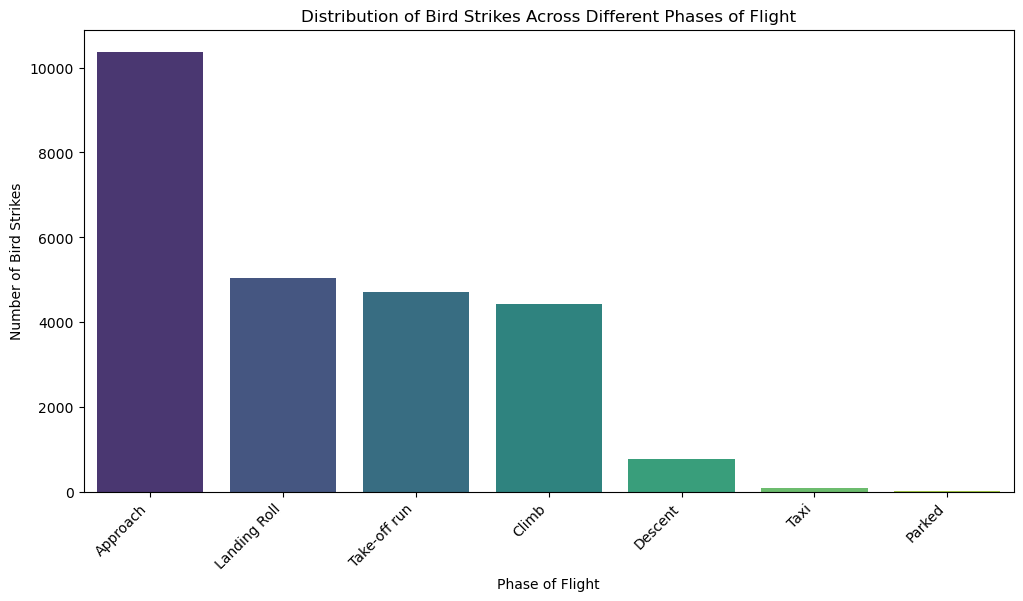

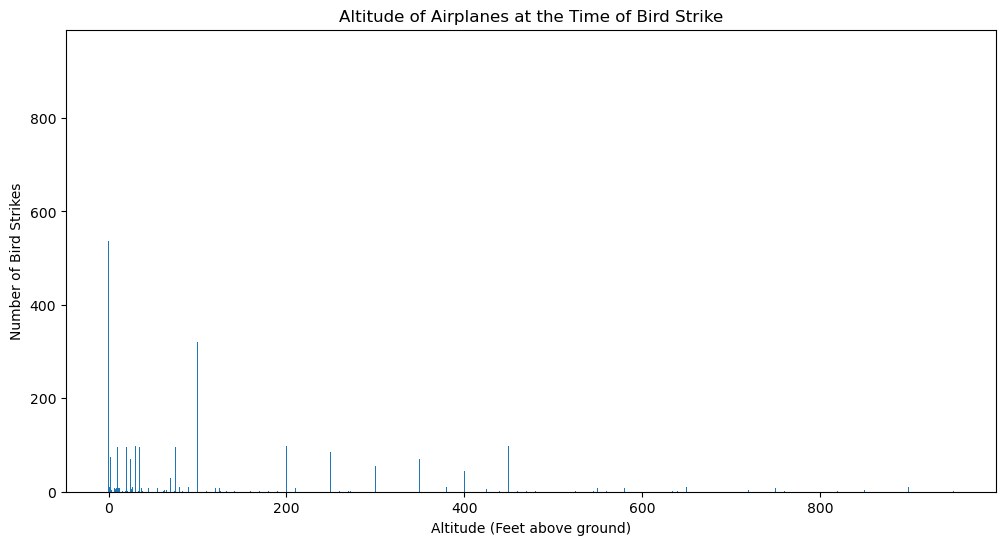

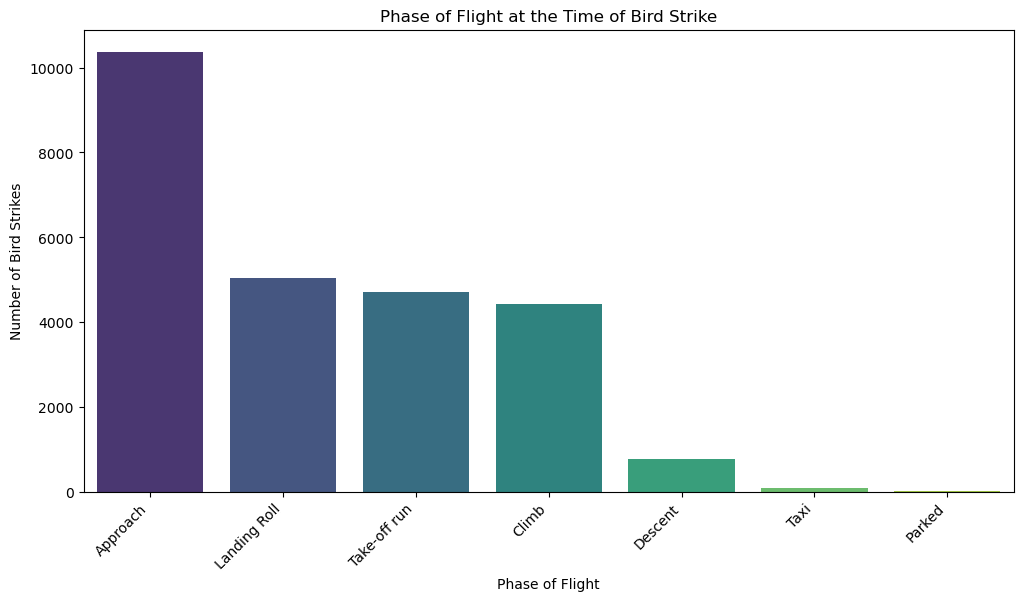

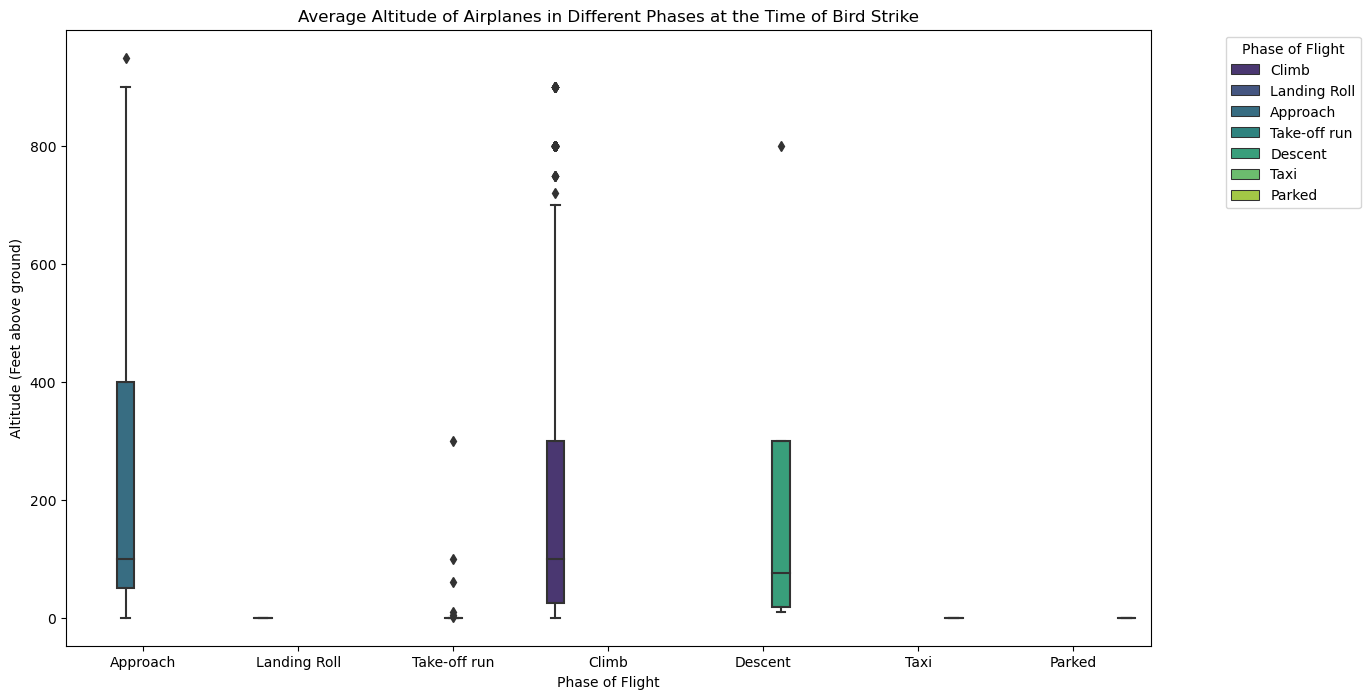

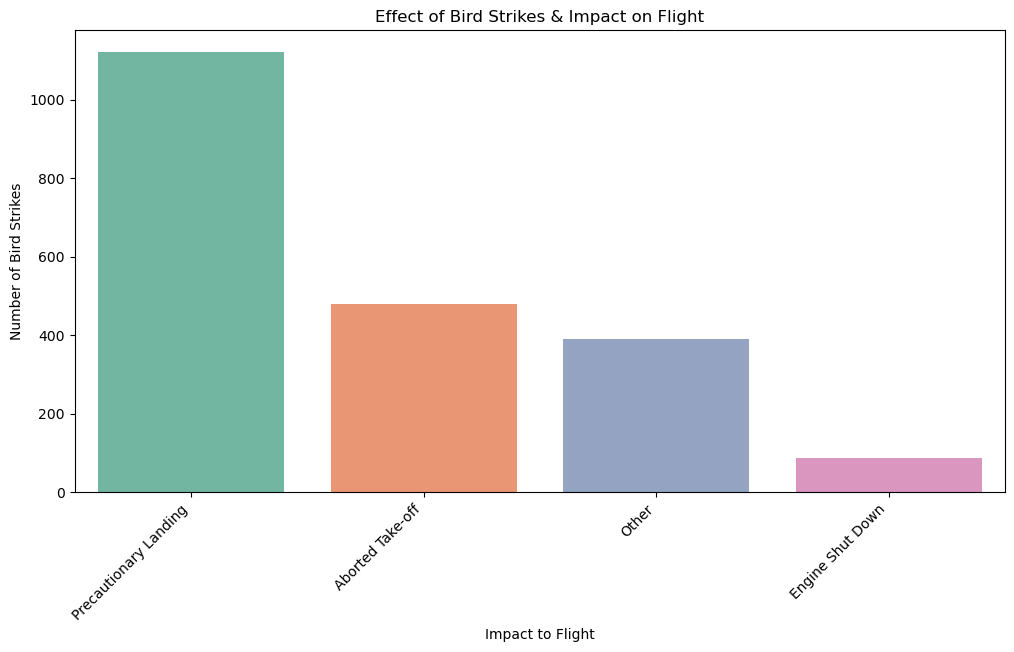

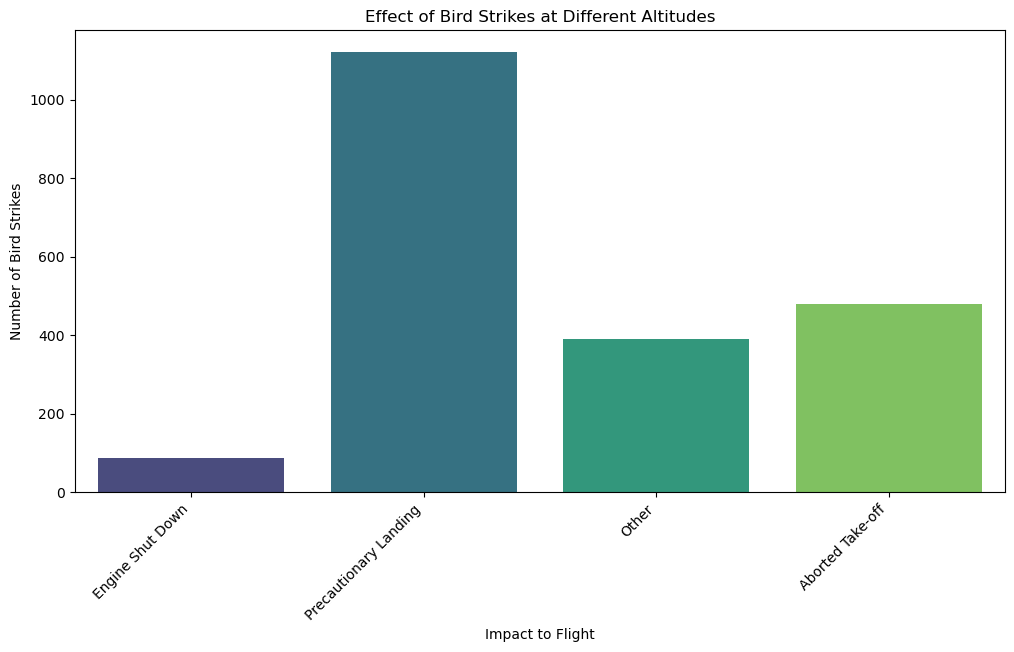

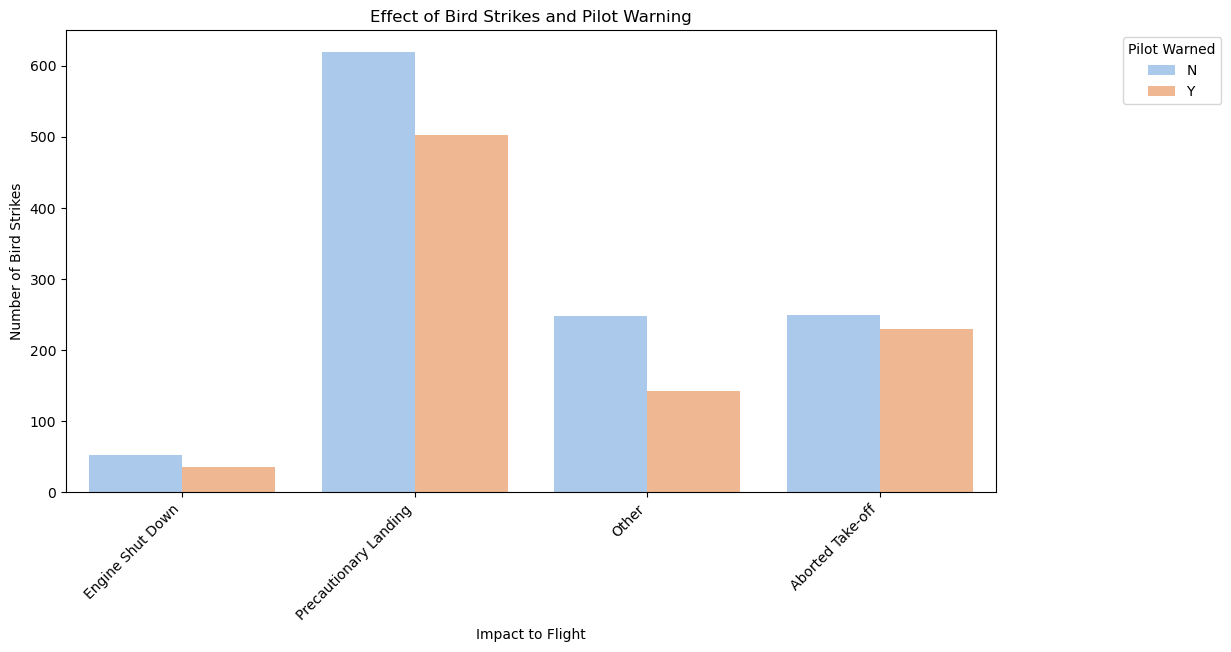

In [67]:
visualize_number_of_strikes_over_years(bird_strikes_df)
yearly_analysis_and_strikes_in_us(bird_strikes_df)
top_us_airlines_with_most_strikes(bird_strikes_df)
top_airports_with_most_incidents(bird_strikes_df)
yearly_cost_incurred_due_to_strikes(bird_strikes_df)
bird_strikes_distribution_across_phases(bird_strikes_df)
altitude_of_airplanes_at_time_of_strike(bird_strikes_df)
phase_of_flight_at_time_of_strike(bird_strikes_df)
average_altitude_of_airplanes_in_different_phases(bird_strikes_df)
effect_of_bird_strikes_and_impact_on_flight(bird_strikes_df)
effect_of_strike_at_different_altitude(bird_strikes_df)
pilot_warning_and_effect_of_strike_relation(bird_strikes_df)